In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 'pandas' is a super common library for dealing with tabular data, and does well with time series data in particular.
# we import the functions of the pandas library as 'pd' by convention

%matplotlib inline

In [197]:
# Let's read the data into a 'DataFrame' (similar to R) and look at the first 5 rows 
df = pd.read_csv('tsaina_river_snow_1990_1991.csv')
df.head(25)

,Julian Date,Snow Depth (m),Air Temp (°C),Ground temp (°C),Wind velocity (m/s),hflux1_W_m2,hflux2_W_m2
0,282.000,0.000,0.369080,0.209930,0.797250,6.95760,6.75059
1,282.042,0.000,-0.059570,0.147827,0.532875,9.31248,9.52303
2,282.083,0.000,-0.578003,0.114471,0.204750,10.09740,9.52303
3,282.125,0.000,-1.223480,0.085876,0.044250,11.95280,10.08620
4,282.167,0.000,-1.688810,0.205139,0.026250,7.31440,6.70635
5,282.208,0.000,-1.725400,0.296295,0.086625,6.13696,5.18688
6,282.250,0.000,-1.821620,0.325104,0.189375,5.03088,4.51313
7,282.292,0.000,-1.858000,0.354065,0.238500,4.63840,4.16922
8,282.333,0.000,-1.798460,0.382965,0.210375,4.63840,3.67547
9,282.375,0.000,-1.359500,0.445862,0.192000,5.03088,2.58942


In [198]:
# And now the last 5 rows
df.tail()

,Julian Date,Snow Depth (m),Air Temp (°C),Ground temp (°C),Wind velocity (m/s),hflux1_W_m2,hflux2_W_m2
4450,467.417,1.5070,-0.030518,-0.117554,0.0,1.10608,1.003590
4451,467.458,1.5038,0.317291,-0.122253,0.0,1.17744,1.001580
4452,467.500,1.4668,0.555176,-0.122253,0.0,0.39248,1.024710
4453,467.542,NaN,0.547699,-0.122253,0.0,0.42816,1.002580
4454,467.583,1.4999,0.447021,-0.122253,0.0,0.39248,0.992527


In [199]:
# Column headers look good, but right now pandas doesn't know this is 'Date-Time' data.
# Actually I barely know that it is a time series...what is a Julian Date?
# Anyway, I'll set 'Julian Date' as the index (basically how we lookup data) for this data frame.
# Notice the left most column has changed.

df = df.set_index(df['Julian Date'])
del df['Julian Date']
df.head()

,Snow Depth (m),Air Temp (°C),Ground temp (°C),Wind velocity (m/s),hflux1_W_m2,hflux2_W_m2
Julian Date,,,,,,
282.000,0.0,0.369080,0.209930,0.797250,6.95760,6.75059
282.042,0.0,-0.059570,0.147827,0.532875,9.31248,9.52303
282.083,0.0,-0.578003,0.114471,0.204750,10.09740,9.52303
282.125,0.0,-1.223480,0.085876,0.044250,11.95280,10.08620
282.167,0.0,-1.688810,0.205139,0.026250,7.31440,6.70635


In [200]:
# Trim to where we have snow on the ground

df = df.iloc[12::]
df.head()

,Snow Depth (m),Air Temp (°C),Ground temp (°C),Wind velocity (m/s),hflux1_W_m2,hflux2_W_m2
Julian Date,,,,,,
282.500,0.023,-0.315155,0.567352,0.309000,6.95760,5.85460
282.542,0.017,0.239868,0.567352,0.389250,6.95760,6.04969
282.583,0.016,0.701538,0.567352,0.466875,6.95760,6.13718
282.625,0.016,0.380188,0.538116,0.513375,7.35008,6.16533
282.667,0.017,-0.347290,0.508942,0.724500,6.95760,6.03461


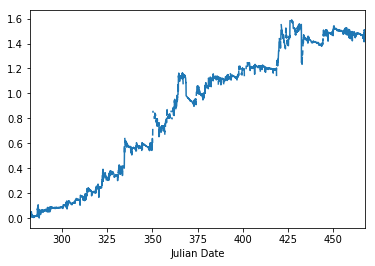

In [201]:
# We know the data starts in 1990 (not a leap year) on Julian date 282, or Oct. 9 as we know it.
df['Snow Depth (m)'].plot()

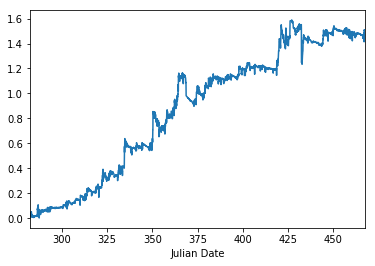

In [202]:
# Fill in the missing data
df.fillna(method='pad', inplace=True)
df['Snow Depth (m)'].plot()

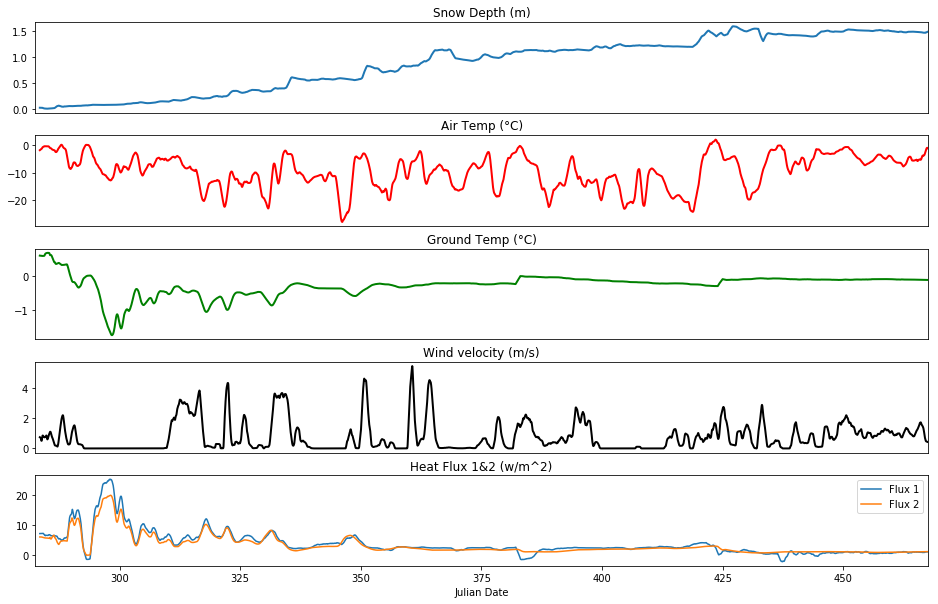

In [203]:
df = df.rolling(24).mean()
fig, axes = plt.subplots(figsize=(16,10), nrows=5, ncols=1)
plt.subplots_adjust(hspace=0.25)

df['Snow Depth (m)'].plot(ax=axes[0], lw=2)
axes[0].set_title('Snow Depth (m)')
axes[0].get_xaxis().set_visible(False)

df['Air Temp (°C)'].plot(ax=axes[1], color='r', lw=2)
axes[1].set_title('Air Temp (°C)')
axes[1].get_xaxis().set_visible(False)

df['Ground temp (°C)'].plot(ax=axes[2], color='g', lw=2)
axes[2].set_title('Ground Temp (°C)')
axes[2].get_xaxis().set_visible(False)

df['Wind velocity (m/s)'].plot(ax=axes[3], color='k', lw=2)
axes[3].set_title('Wind velocity (m/s)')
axes[3].get_xaxis().set_visible(False)

df['hflux1_W_m2'].plot(ax=axes[4],label='Flux 1')
df['hflux2_W_m2'].plot(ax=axes[4],label='Flux 2')
axes[4].set_title('Heat Flux 1&2 (w/m^2)')
axes[4].legend()

plt.savefig('tsaina_timeseries_1990_1991.png', dpi=300)

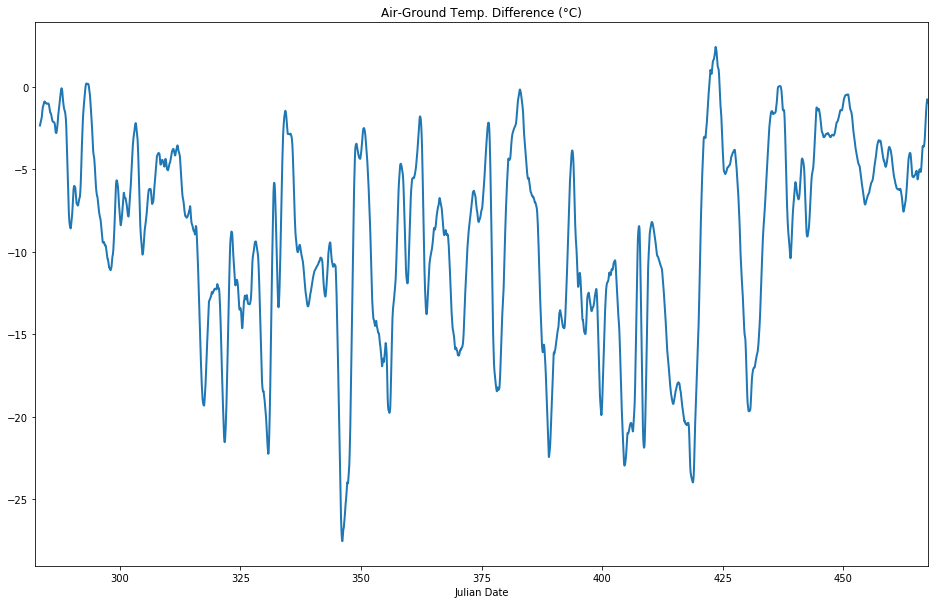

In [206]:
df['Temp Diff'] = (df['Air Temp (°C)'] - df['Ground temp (°C)'])

fig, axes = plt.subplots(figsize=(16,10), nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.25)
ax = df['Temp Diff'].plot(lw=2)
ax.set_title('Air-Ground Temp. Difference (°C)')

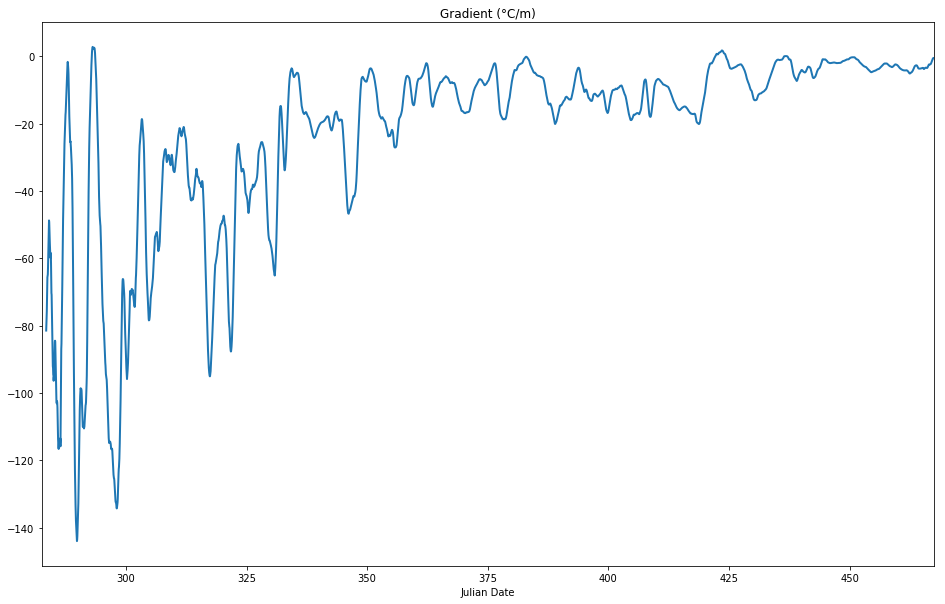

In [207]:
df['Gradient'] = (df['Temp Diff'] / df['Snow Depth (m)'])

fig, axes = plt.subplots(figsize=(16,10), nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.25)
ax = df['Gradient'].plot(lw=2)
ax.set_title('Gradient (°C/m)')

(-20, 5)

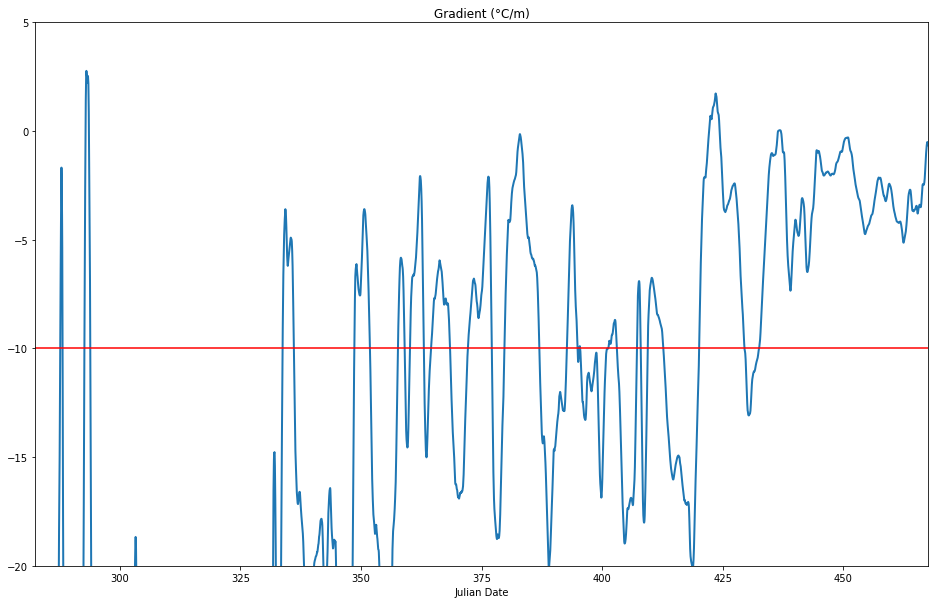

In [212]:
df['Gradient'] = (df['Temp Diff'] / df['Snow Depth (m)'])

fig, axes = plt.subplots(figsize=(16,10), nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.25)
ax = df['Gradient'].plot(lw=2)
plt.axhline(y=-10, color='r')
ax.set_title('Gradient (°C/m)')
ax.set_ylim(-20, 5)